<img style="float: right;" width="120" src="../Images/supplier-logo.png">
<img style="float: left; margin-top: 0" width="80" src="../Images/client-logo.png">
<br><br><br>

## Introduction ##

The International Monetary Fund (IMF) Statistics Department (STA) allows API access to their economic time series. 

Well-known datasets such as International Financial Statistics (IFS) can be machine read through the API. 

This example will use 
- Python to retrieve Direction of Trade Statistics (DOTS) 
- data from STA’s JSON RESTful Web Service <br>

so that we can determine the United States’ share of world exports over the past 50 years.





## Load in the libraries ##

In [1]:
import requests
import pandas as pd

## Find the name of the series we are interested in ##

In this example its DOT


In [2]:
# Find the series id and text name.
url = 'http://dataservices.imf.org/REST/SDMX_JSON.svc/Dataflow'
seriesids = requests.get(url)

data = seriesids.json()['Structure']['Dataflows']['Dataflow']

df = pd.DataFrame(data)

In [3]:
df.head()

,@id,@version,@agencyID,@isFinal,@xmlns,Name,KeyFamilyRef,Description
0,DS-BOP_2017M06,1.0,IMF,true,http://www.SDMX.org/resources/SDMXML/schemas/v...,"{'@xml:lang': 'en', '#text': 'Balance of Payme...","{'KeyFamilyID': 'BOP_2017M06', 'KeyFamilyAgenc...",NaN
1,DS-BOP_2020M3,1.0,IMF,true,http://www.SDMX.org/resources/SDMXML/schemas/v...,"{'@xml:lang': 'en', '#text': 'Balance of Payme...","{'KeyFamilyID': 'BOP_2020M3', 'KeyFamilyAgency...",NaN
2,DS-BOP_2017M11,1.0,IMF,true,http://www.SDMX.org/resources/SDMXML/schemas/v...,"{'@xml:lang': 'en', '#text': 'Balance of Payme...","{'KeyFamilyID': 'BOP_2017M11', 'KeyFamilyAgenc...",NaN
3,DS-DOT_2020Q1,1.0,IMF,true,http://www.SDMX.org/resources/SDMXML/schemas/v...,"{'@xml:lang': 'en', '#text': 'Direction of Tra...","{'KeyFamilyID': 'DOT_2020Q1', 'KeyFamilyAgency...",NaN
4,DS-GFSMAB2016,1.0,IMF,true,http://www.SDMX.org/resources/SDMXML/schemas/v...,"{'@xml:lang': 'en', '#text': 'Government Finan...","{'KeyFamilyID': 'GFSMAB2016', 'KeyFamilyAgency...",NaN


In [4]:
for x in range(0, 20):
    items = (str(df['@id'][x]), str(df['Name'][x]['#text']))
    print(': '.join(items))

DS-BOP_2017M06: Balance of Payments (BOP), 2017 M06
DS-BOP_2020M3: Balance of Payments (BOP), 2020 M03
DS-BOP_2017M11: Balance of Payments (BOP), 2017 M11
DS-DOT_2020Q1: Direction of Trade Statistics (DOTS), 2020 Q1
DS-GFSMAB2016: Government Finance Statistics Yearbook (GFSY 2016), Main Aggregates and Balances
DS-BOP_2019M12: Balance of Payments (BOP), 2019 M12
DS-GFSYFALCS2014: Government Finance Statistics Yearbook (GFSY 2014), Financial Assets and Liabilities by Counterpart Sector
DS-GFSE2016: Government Finance Statistics Yearbook (GFSY 2016), Expense
DS-FM201510: Fiscal Monitor (FM) October 2015
DS-GFSIBS2016: Government Finance Statistics Yearbook (GFSY 2016), Integrated Balance Sheet (Stock Positions and Flows in Assets and Liabilities)
DS-IFS_2019M01: International Financial Statistics (IFS), 2019 M01
DS-DOT_2018Q3: Direction of Trade Statistics (DOTS), 2018 Q3
DS-FM201604: Fiscal Monitor (FM) April 2016
DS-WHDREO201504: Western Hemisphere Regional Economic Outlook (WHDREO) Apr

## Retrieve the DOT data we are interested in 

In [5]:
# Annotations for the series
url = "http://dataservices.imf.org/REST/SDMX_JSON.svc/DataStructure/DOT"
dotstruct = requests.get(url).json()
df = pd.DataFrame(dotstruct['Structure']['KeyFamilies']\
     ['KeyFamily']['Annotations'])
for x in range(0, 7): 
     items = (str(df['Annotation'][x]['AnnotationTitle']), \
     str(df['Annotation'][x]['AnnotationText']['#text']))
     print(': '.join(items))

Latest Update Date: 07/24/2020
Name: Direction of Trade Statistics (DOTS)
Temporal Coverage: Monthly and quarterly data are available starting 1960. Annual data are available starting 1947.
Geographic Coverage: DOTS covers all IMF member states, some non-member countries, the world, and major areas.
Methodology: Guide to Direction of Trade Statistics, 1993. See Documents tab.
Definition: The <B>Direction of Trade Statistics (DOTS)</B> presents the value of merchandise exports and imports disaggregated according to a country's primary trading partners. Area and world aggregates are included in the display of trade flows between major areas of the world. Reported data is supplemented by estimates whenever such data is not available or current. Imports are reported on a cost, insurance and freight (CIF) basis and exports are reported on a free on board (FOB) basis, with the exception of a few countries for which imports are also available FOB. Time series data includes estimates derived f

## Find the series dimensions

In [6]:
# Look at structure of DOTS data to find the dimensions for our data request
url = "http://dataservices.imf.org/REST/SDMX_JSON.svc/DataStructure/DOT"
dotstruct = requests.get(url).json()
df = pd.DataFrame(dotstruct['Structure']['KeyFamilies']['KeyFamily']\
          ['Components']['Dimension'])
for x in range(0, 4): 
     items = ("Dimension", str(x+1), str(df['@codelist'][x]))
     print(': '.join(items))

Dimension: 1: CL_FREQ
Dimension: 2: CL_AREA_DOT
Dimension: 3: CL_INDICATOR_DOT
Dimension: 4: CL_COUNTERPART_AREA_DOT


## Find Country codes 

In [7]:
# Obtain country codes
url = "http://dataservices.imf.org/REST/SDMX_JSON.svc/CodeList/CL_AREA_DOT"
country = requests.get(url).json()
df = pd.DataFrame(country['Structure']['CodeLists']['CodeList']['Code'])
for x in [214, 245]: 
     items = (str(df['@value'][x]), str(df['Description'][x]['#text']))
     print(': '.join(items))

US: United States
A10: Western Hemisphere


The series ID is DOT and the country codes (we will use this with the exporting country, CL_AREA_DOT, and the counterpart, CL_COUNTERPART_AREA_DOT) of interest are W00 for world and US for the US. 

We see below that the indicator of interest is TXG_FOB_USD, Goods, Value of Exports, Free on board (FOB), US Dollars.

## Find column IDs

In [8]:
# Obtain series info and ids
url = "http://dataservices.imf.org/REST/SDMX_JSON.svc/CodeList/CL_INDICATOR_DOT"
series = requests.get(url).json()
df = pd.DataFrame(series['Structure']['CodeLists']['CodeList']['Code'])
for x in range(0, 4): 
     items = (str(df['@value'][x]), str(df['Description'][x]['#text']))
     print(': '.join(items))

TXG_FOB_USD: Goods, Value of Exports, Free on board (FOB), US Dollars
TMG_CIF_USD: Goods, Value of Imports, Cost, Insurance, Freight (CIF), US Dollars
TMG_FOB_USD: Goods, Value of Imports, Free on board (FOB), US Dollars
TBG_USD: Goods, Value of Trade Balance, US Dollars


## Retrieving Data 

The guide to STA’s API shows how we can combine information from the previous steps to call and retrieve data. For direction of trade statistics, we see that the dimensions are as follows:

- Dimension 1: CL_FREQ (the frequency of the data–we want to use monthly data) – M

- Dimension 2: CL_AREA_DOT (the primary country) – US

- Dimension 3: CL_INDICATOR_DOT (the measure–we want to look at exports free of board) – TXG_FOB_USD

- Dimension 4: CL_COUNTERPART_AREA_DOT (the counterpart country) – W00

The JSON RESTful API method for requesting the data is the CompactData Method. 

The format for putting together dimension and time period information is shown on the Web Service knowledge base as:

In [9]:
url = 'http://dataservices.imf.org/REST/SDMX_JSON.svc/CompactData/DOT/M.US.TXG_FOB_USD.W00.?startPeriod=1981&endPeriod=2019'
data = requests.get(url).json()
usexp = pd.DataFrame(data['CompactData']['DataSet']['Series']['Obs'])
usexp.columns = ['date','usexports'];
usexp.tail()

,date,usexports
463,2019-08,138693.44359
464,2019-09,134622.152148
465,2019-10,142342.051491
466,2019-11,137312.453522
467,2019-12,135837.049194


## Retrieve Data for US+JP+CN

In [10]:
ourl = 'http://dataservices.imf.org/REST/SDMX_JSON.svc/CompactData/DOT/M.US+CN+JP+W00.TXG_FOB_USD.W00.?startPeriod=1972&endPeriod=2019'
odata = requests.get(ourl).json();

wexp = pd.DataFrame(odata['CompactData']['DataSet']['Series'][0]['Obs'])
wexp.columns = ['date','wexports']
del wexp['date']

chexp = pd.DataFrame(odata['CompactData']['DataSet']['Series'][1]['Obs'])
chexp.columns = ['date','chexports']
del chexp['date']

jpexp = pd.DataFrame(odata['CompactData']['DataSet']['Series'][2]['Obs'])
jpexp.columns = ['date','jpexports']
del jpexp['date']

usexp = pd.DataFrame(odata['CompactData']['DataSet']['Series'][3]['Obs'])
usexp.columns = ['date','usexports']

## Prepare a new dataframe 

- US Exports

- World Exports

- Japan Exports

- China Exports

and CALCULATE SHARE OF WORLD EXPORTS FOR EACH COUNTRY

In [11]:
combined = pd.concat([usexp, wexp, chexp, jpexp], axis=1)
combined['date'] = pd.to_datetime(combined['date'])
combined = combined.set_index(combined['date'])
del combined['date'] 

usexports = pd.to_numeric(combined['usexports'])
wexports = pd.to_numeric(combined.wexports)
cexports = pd.to_numeric(combined.chexports)
jexports = pd.to_numeric(combined.jpexports)

# Convert to numeric
combined['usshare'] = usexports / wexports * 100
combined['chinashare'] = cexports / wexports * 100
combined['japanshare'] = jexports / wexports * 100
combined.tail()

,usexports,wexports,chexports,jpexports,usshare,chinashare,japanshare
date,,,,,,,
2019-08-01,138693.44359,1505162.322881,NaN,57787.496438,9.214517,NaN,3.839287
2019-09-01,134622.152148,1568903.860755,NaN,59249.937644,8.580650,NaN,3.776518
2019-10-01,142342.051491,1645014.09443,NaN,60829.223891,8.652938,NaN,3.697793
2019-11-01,137312.453522,1580655.888383,NaN,58634.166547,8.687055,NaN,3.709483
2019-12-01,135837.049194,1562793.005221,NaN,60252.163033,8.691941,NaN,3.855415


## Graphing the data


### Graph of US share of workd exports

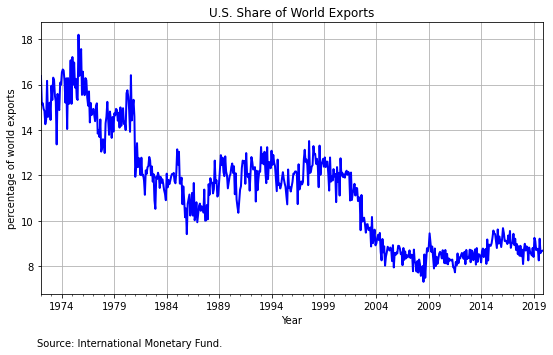

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
txt = '''Source: International Monetary Fund.'''

# Plot US share of world exports
combined.usshare.plot(grid=True, figsize=(9, 5), color="blue", linewidth=2,)
plt.ylabel('percentage of world exports')
plt.xlabel('Year')
plt.text(20,4.5,txt)
plt.title('U.S. Share of World Exports');

### Graph of moving average of US, China, AND Japan shares of workd exports

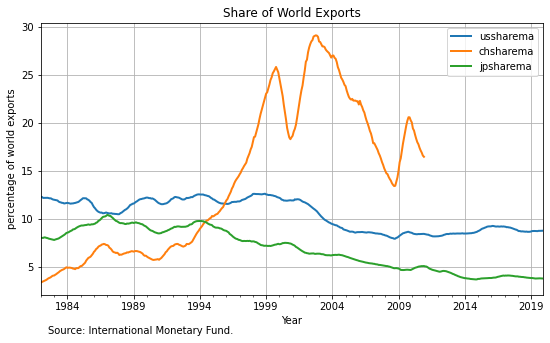

In [13]:
# Calculate moving average for each share, to reduce noise
combined['ussharema'] = combined['usshare'].rolling(12,12).mean()
combined['chsharema'] = combined['chinashare'].rolling(12,12).mean()
combined['jpsharema'] = combined['japanshare'].rolling(12,12).mean()

combshares = combined[['ussharema', 'chsharema', 'jpsharema']]
shares = list(combshares);
# Plot various shares of world exports
combined[shares][120:].plot(grid=True, figsize=(9, 5), linewidth=2)
plt.ylabel('percentage of world exports')
plt.xlabel('Year')
plt.text(150,-2,txt)
plt.title('Share of World Exports', );

### Save the data to a csv file

In [ ]:
combined.to_csv('../Data/us_share_exports.csv')

In [18]:
writer = pd.ExcelWriter(path='../Data/Exports.xlsx')

combined.to_excel(excel_writer=writer, sheet_name='Exports')

writer.save()